**Proyek Analisis Data: Bike Sharing Dataset**


*    Nama:HILAL HIBRIZI
*   Email: m789b4ky1781@bangkit.academy
*  ID Dicoding: hilalhibrizi



1.   Bagaimana kondisi cuaca memengaruhi jumlah penyewa sepeda ?
2.   Berapa Total Penyewa Sepeda berdasarkan Hari dalam Seminggu ?
3.   Berapa total penyewa sepeda Bagaimana tren pertumbuhan penyewa baru dan terdaftar dari hari ke hari ?



## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data Wrangling

## Gathering Data

In [4]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Asessing Data

### Menilai table day

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


###Menilai table hour

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Data Cleaning

### Membersihkan table day

#### Duplicate data

In [12]:
day_df.duplicated().sum()

np.int64(0)

In [13]:
day_df.drop_duplicates(inplace=True)

In [14]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


#### Missing Value

In [15]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Inaccurate Value

In [17]:
#mengganti weathersit dari int menjadi object, hal ini dilakukan agar data yang ditampilkan lebih jelas
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju',
    4: 'cuaca buruk'
}
day_df['weathersit'] = day_df['weathersit'].replace(weather_mapping)
print(day_df[['weathersit', 'cnt']].head())

  weathersit   cnt
0    Berawan   985
1    Berawan   801
2      Cerah  1349
3      Cerah  1562
4      Cerah  1600


In [18]:
#mengubah type dtday dari object ke date
print(day_df['dteday'].head())
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(hour_df['dteday'].head())


0    2011-01-01
1    2011-01-02
2    2011-01-03
3    2011-01-04
4    2011-01-05
Name: dteday, dtype: object
0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object


In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [20]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Membersihkan Table hour

#### Duplicate Data

In [21]:
hour_df.duplicated().sum()

np.int64(0)

In [22]:
hour_df.drop_duplicates(inplace=True)

In [23]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


#### Missing Value

In [24]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [25]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Inaccurate Value

In [26]:
#mengganti weathersit dari int menjadi object, hal ini dilakukan agar data yang ditampilkan lebih jelas
weather_mapping = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan/Salju',
    4: 'cuaca buruk'
}
hour_df['weathersit'] = hour_df['weathersit'].replace(weather_mapping)
print(hour_df[['weathersit', 'cnt']].head())


  weathersit  cnt
0      Cerah   16
1      Cerah   40
2      Cerah   32
3      Cerah   13
4      Cerah    1


In [27]:
#mengubah type dtday dari object ke date
print(hour_df['dteday'].head())
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df['dteday'].head())


0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: dteday, dtype: object
0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: dteday, dtype: datetime64[ns]


In [28]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [29]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Explore data day

In [30]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
336,337,2011-12-03,4,0,12,0,6,0,Cerah,0.299167,0.310604,0.612917,0.095783,706,2908,3614
528,529,2012-06-12,2,1,6,0,2,1,Berawan,0.653333,0.597875,0.833333,0.214546,477,4495,4972
345,346,2011-12-12,4,0,12,0,1,1,Cerah,0.238333,0.270196,0.670833,0.063450,143,3167,3310
460,461,2012-04-05,2,1,4,0,4,1,Cerah,0.435000,0.431163,0.374167,0.219529,1192,5265,6457
131,132,2011-05-12,2,0,5,0,4,1,Cerah,0.535000,0.523363,0.747500,0.189667,695,4169,4864


In [31]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
day_df.instant.is_unique


True

In [33]:

day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

<Axes: >

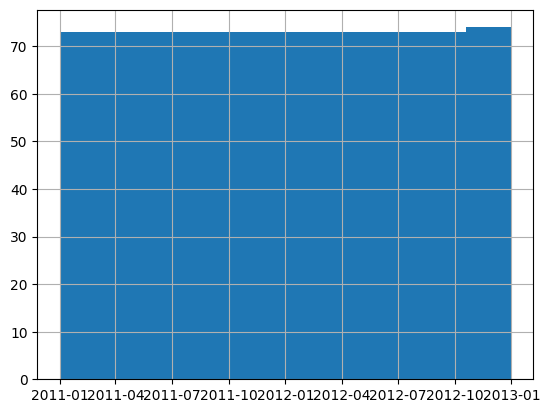

In [34]:
day_df.dteday.hist()

### Explore data hour

In [35]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5251,5252,2011-08-11,3,0,8,17,0,4,1,Cerah,0.80,0.6970,0.29,0.2537,96,486,582
11992,11993,2012-05-19,2,1,5,21,0,6,0,Cerah,0.64,0.6212,0.50,0.0000,81,178,259
14508,14509,2012-09-01,3,1,9,17,0,6,0,Berawan,0.82,0.7727,0.52,0.0000,205,258,463
6547,6548,2011-10-05,4,0,10,9,0,3,1,Cerah,0.54,0.5152,0.60,0.2985,32,187,219
9448,9449,2012-02-03,1,1,2,14,0,5,1,Cerah,0.36,0.3485,0.46,0.2239,22,148,170


In [36]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
hour_df.instant.is_unique

True

In [38]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

<Axes: >

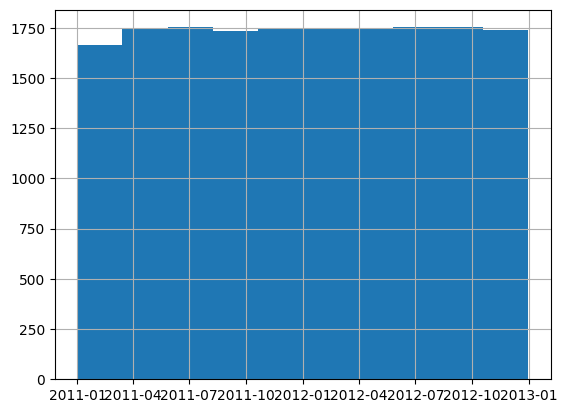

In [39]:
hour_df.dteday.hist()

### Explore data day & hour

In [40]:
merged_df = pd.merge(hour_df, day_df[['dteday', 'weathersit']], on='dteday', how='inner')

In [41]:
print(merged_df.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

  weathersit_x  temp   atemp   hum  windspeed  casual  registered  cnt  \
0        Cerah  0.24  0.2879  0.81        0.0       3          13   16   
1        Cerah  0.22  0.2727  0.80        0.0       8          32   40   
2        Cerah  0.22  0.2727  0.80        0.0       5          27   32   
3        Cerah  0.24  0.2879  0.75        0.0       3          10   13   
4        Cerah  0.24  0.2879  0.75        0.0       0           1    1   

  weathersit_y  
0      Berawan  
1      Berawan  
2      Berawan  
3      Berawan  
4      

In [42]:
# Menghapus kolom yang tidak diperlukan
merged_df.drop(columns=['weathersit_y'], inplace=True)

In [43]:
# Mengganti kode cuaca dengan deskripsi
weather_conditions = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan'
}

merged_df['weathersit_x'] = merged_df['weathersit_x'].replace(weather_conditions)


In [44]:
# Menghitung total penyewa berdasarkan kondisi cuaca serta mengurutkan data terkecil ke terbesar agar mudah dibaca
weather_agg = merged_df.groupby('weathersit_x')['cnt'].sum().reset_index()
weather_agg.columns = ['Kondisi Cuaca', 'Total Penyewa']
weather_agg_sorted = weather_agg.sort_values(by='Total Penyewa', ascending=True)

print(weather_agg_sorted)


  Kondisi Cuaca  Total Penyewa
3   cuaca buruk            223
2   Hujan/Salju         158331
0       Berawan         795952
1         Cerah        2338173


# Visualization & Explanatory Analysis

 #### 1. Bagaimana kondisi cuaca memengaruhi jumlah penyewa sepeda?

In [51]:
merged_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit_x,temp,atemp,hum,windspeed,casual,registered,cnt
5064,5065,2011-08-03,3,0,8,22,0,3,1,Hujan/Salju,0.68,0.6364,0.89,0.1045,11,66,77
9913,9914,2012-02-23,1,1,2,2,0,4,1,Berawan,0.44,0.4394,0.62,0.2239,5,4,9
12001,12002,2012-05-20,2,1,5,6,0,0,0,Cerah,0.50,0.4848,0.63,0.1343,4,21,25
10030,10031,2012-02-27,1,1,2,23,0,1,1,Cerah,0.42,0.4242,0.50,0.1642,6,50,56
5876,5877,2011-09-07,3,0,9,8,0,3,1,Hujan/Salju,0.62,0.5455,0.94,0.0896,9,319,328


<Figure size 800x600 with 0 Axes>

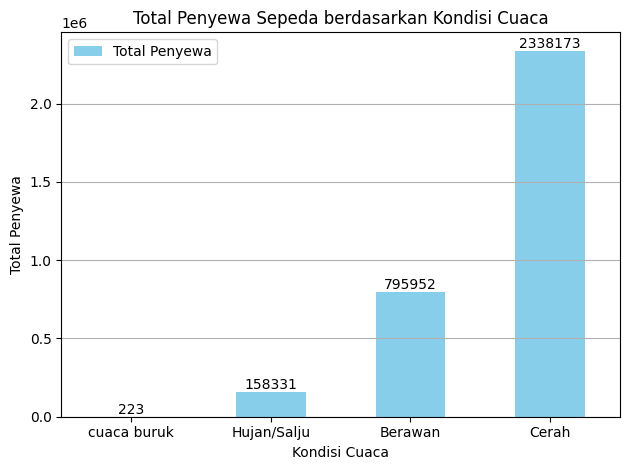

In [46]:
plt.figure(figsize=(8, 6))
weather_agg_sorted.plot(kind='bar', x='Kondisi Cuaca', y='Total Penyewa', color='skyblue')
plt.title('Total Penyewa Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewa')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Menambahkan keterangan pada setiap grafik batang
for i, val in enumerate(weather_agg_sorted['Total Penyewa']):
    plt.text(i, val + 20, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### berapa Total Penyewa Sepeda berdasarkan Hari dalam Seminggu

In [47]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung total penyewa
weekly_pattern = merged_df.groupby('weekday')['cnt'].sum().reset_index()
weekly_pattern.columns = ['Hari', 'Total Penyewa']

# Mengonversi angka hari ke nama hari
hari_nama = {0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'}
weekly_pattern['Hari'] = weekly_pattern['Hari'].map(hari_nama)

# sorted data
hari_urut = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
weekly_pattern['Hari'] = pd.Categorical(weekly_pattern['Hari'], categories=hari_urut, ordered=True)
weekly_pattern = weekly_pattern.sort_values('Hari')


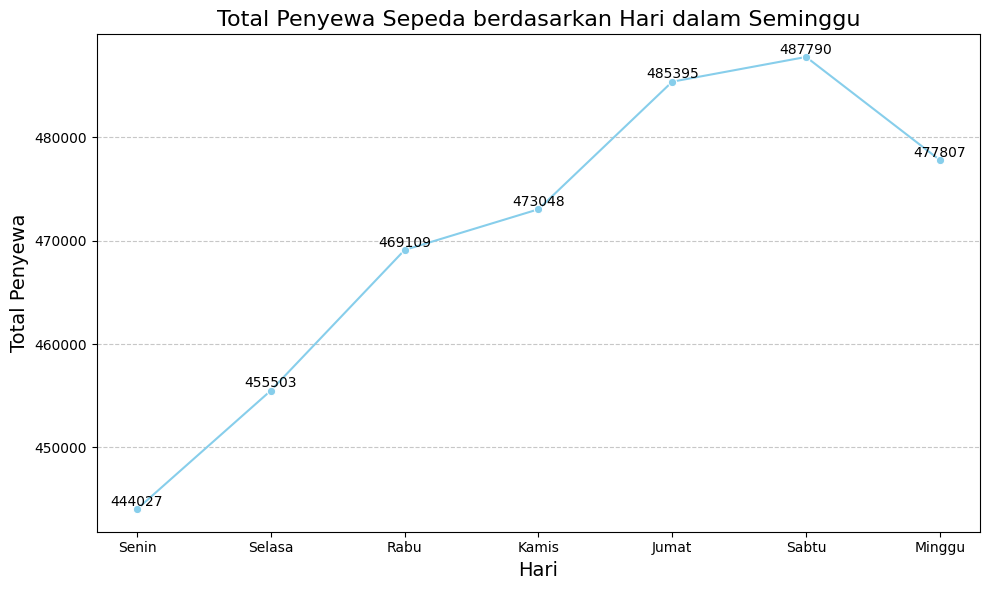

In [48]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=weekly_pattern, x='Hari', y='Total Penyewa', marker='o', color='skyblue')

# Menambahkan label dan judul
plt.title('Total Penyewa Sepeda berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Total Penyewa', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan keterangan
for i, val in enumerate(weekly_pattern['Total Penyewa']):
    plt.text(i, val + 20, str(val), ha='center', va='bottom')

plt.tight_layout()
plt.show()


#### Bagaimana tren pertumbuhan penyewa baru dan terdaftar dari hari ke hari?

In [49]:
segmentation = merged_df.groupby('weekday')[['casual', 'registered']].sum().reset_index()
segmentation['Total Penyewa'] = segmentation['casual'] + segmentation['registered']
segmentation.columns = ['Hari', 'Penyewa Baru', 'Penyewa Terdaftar', 'Total Penyewa']

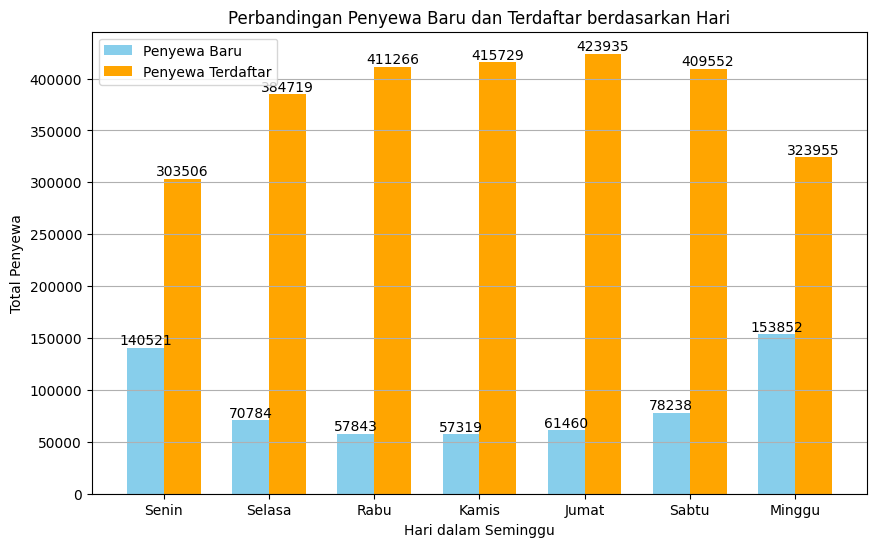

In [50]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(segmentation['Hari']))

# Plot untuk penyewa baru
bars1 = plt.bar(x, segmentation['Penyewa Baru'], width=bar_width, label='Penyewa Baru', color='skyblue')

# Plot untuk penyewa terdaftar
bars2 = plt.bar([p + bar_width for p in x], segmentation['Penyewa Terdaftar'], width=bar_width, label='Penyewa Terdaftar', color='orange')

# Menambahkan label dan judul
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penyewa')
plt.title('Perbandingan Penyewa Baru dan Terdaftar berdasarkan Hari')
plt.xticks([p + bar_width / 2 for p in x], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.legend()
plt.grid(axis='y')

# Menambahkan angka pada setiap batang grafik
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


# conclution



* Total penyewa berdasarkan cuaca
*  Total penyewa sepeda berdasarkan hari dalam seminggu:
* Perbandingan penyewa baru dan penyewa yang sudah terdaftar sebelumnya dalam penggunaan sepeda berdasarkan hari


>Dari visualisasi penggunaan sepeda berdasarkan kondisi cuaca, terlihat jelas bahwa hari-hari cerah mendorong peningkatan jumlah penyewa sepeda secara signifikan dibandingkan dengan cuaca buruk. Temuan ini mengkonfirmasi bahwa cuaca yang baik berfungsi sebagai pendorong utama bagi pengguna untuk memilih bersepeda.
Oleh karena itu, dapat disimpulkan bahwa faktor cuaca, khususnya suhu dan kondisi cuaca umum, memiliki dampak yang besar terhadap permintaan sepeda. Informasi ini sangat berharga untuk merumuskan strategi pemasaran dan promosi, serta dalam penyesuaian layanan sesuai dengan kondisi cuaca yang berlaku, sehingga dapat memaksimalkan pengalaman pengguna

>Dari analisis data penggunaan sepeda, terlihat bahwa jumlah penyewaan sepeda
meningkat pada hari libur dibandingkan hari kerja, dengan puncak penggunaan terjadi pada akhir pekan. Ini menunjukkan bahwa banyak orang memanfaatkan waktu luang untuk beraktivitas di luar. Selain itu, suhu yang lebih tinggi juga berkontribusi pada peningkatan jumlah penyewa. Hal ini menegaskan pentingnya cuaca dan waktu dalam menentukan pola penyewaan sepeda. Informasi ini dapat digunakan untuk merencanakan promosi dan kegiatan yang menarik pada hari-hari tertentu, serta menyesuaikan layanan untuk memaksimalkan penggunaan sepeda.


> dari visualisasi diatas, Terdapat fluktuasi yang signifikan pada jumlah penyewa sepeda setiap harinya, menunjukkan adanya faktor-faktor yang mempengaruhi minat masyarakat untuk menyewa sepeda. Analisis lebih lanjut diperlukan untuk mengidentifikasi faktor-faktor tersebut dan merumuskan strategi yang tepat.




